In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


### Importing Important Libraries

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## LOADING THE DATASETS and READING THEM

In [4]:
# Loading and Reading Datasets
df_train = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
df_test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
df_sample = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv')

In [5]:
# Start 5 columns of Train Dataset
df_train.head()

ID  RecipeNumber  RecipeCode                              RecipeName  \
0   70            71       12259  Banana Bars with Cream Cheese Frosting   
1   72            88        8202                        Simple Taco Soup   
2  458             3        2832                       Cheeseburger Soup   
3    7            50      100276               Grilled Huli Huli Chicken   
4   60            12       19731                        Cauliflower Soup   

                     CommentID                         UserID        UserName  \
0   sp_aUSaElGf_12259_c_149978  u_1oKVaBmiEKwAFyiHrDLoWpbel0J   misscoffeepot   
1    sp_aUSaElGf_8202_c_310332  u_1oKZeRIXYzGNhGW8OMR3O4lX1ih  MichelleMalone   
2    sp_aUSaElGf_2832_c_206522  u_1oKYHUtdaD48KJCDYq5wfpAUxWz       jeannem32   
3  sp_aUSaElGf_100276_c_434088  u_1oKZCQcKQZdQhDVBS7oISc216VA           ds422   
4   sp_aUSaElGf_19731_c_387011  u_1oKd4sudZQPgu6YALiC7bW7mKMs     SusanHoward   

   UserReputation  CreationTimestamp  ReplyCount  ThumbsUpCount  \
0              20         1622717078           0              0   
1               1         1622717852           0              0   
2               1         1622717357           0              0   
3               1         1622648899           0              0   
4               1         1622718260           0              0   

   ThumbsDownCount  Rating  BestScore  \
0                0       5        100   
1                1       5        100   
2                0       3        100   
3                0       5        100   
4                0       4        100   

                                       Recipe_Review  
0  great recipe! I have made them just as written...  
1  This is an easy and quick recipe that is great...  
2  I think I was looking for something extra spec...  
3  This is our favorite grilled chicken recipe.  ...  
4  Great basic recipe. I added 2 teaspoons Tuscan...

In [6]:
# Last 5 columns of Train Dataset
df_train.tail()

ID  RecipeNumber  RecipeCode                    RecipeName  \
13631  115            98       11767  Quick Cream of Mushroom Soup   
13632  372             6       21444       Favorite Chicken Potpie   
13633   87            37       20170                  Taco Lasagna   
13634   48            63       24886         Chicken and Dumplings   
13635  379             3        2832             Cheeseburger Soup   

                        CommentID                         UserID  \
13631  sp_aUSaElGf_11767_c_127710  u_1oKVbHjirkAIWwTjbt9dWyqENo2   
13632  sp_aUSaElGf_21444_c_196030  u_1oKXoBnyJ2ocquNYwAhs19LMSrA   
13633  sp_aUSaElGf_20170_c_359338  u_1oKbGr5o9tj0mQl1rkVqzWnE481   
13634  sp_aUSaElGf_24886_c_175514  u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW   
13635   sp_aUSaElGf_2832_c_278956  u_1oKYPsERQ0GvUcjIsuAxzmnsQGW   

             UserName  UserReputation  CreationTimestamp  ReplyCount  \
13631           elbay               1         1622716969           0   
13632  PauletteInhofe               1         1622717329           0   
13633   Barbaralarkin               1         1622718089           0   
13634     SammyPrissy               1         1622717192           0   
13635   morgantowndan               1         1622717703           0   

       ThumbsUpCount  ThumbsDownCount  Rating  BestScore  \
13631              0                0       5        100   
13632              0                0       5        100   
13633              0                0       5        100   
13634              0                0       5        100   
13635              0                0       5        100   

                                           Recipe_Review  
13631  Delicious!! Very easy to make! One minor chang...  
13632  I made this pie for my family and they loved i...  
13633                                        Very tasty!  
13634  I have made this numerous times.  It&#39;s so ...  
13635  Super. I added 1/2 lb chopped bacon to mine. H...

In [7]:
# Start 5 columns of Test Dataset
df_test.head()

ID  RecipeNumber  RecipeCode                    RecipeName  \
0   86            45       41384  Black Bean ‘n’ Pumpkin Chili   
1  102            53        3143                  Pumpkin Bars   
2  156            53        3143                  Pumpkin Bars   
3   18            89        1324           Porcupine Meatballs   
4   27            70       32264       Easy Chicken Enchiladas   

                    CommentID                         UserID  \
0  sp_aUSaElGf_41384_c_341929  u_1oKc4U6bh65cEli8Z8eTIf98Vpr   
1   sp_aUSaElGf_3143_c_274545  u_1oKW5seFLQMSwAeOfBVmwJizy5D   
2   sp_aUSaElGf_3143_c_398512  u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz   
3   sp_aUSaElGf_1324_c_431662  u_1oKWCP33NVk4Osfpu4VJuIckEF0   
4  sp_aUSaElGf_32264_c_423935  u_1oKVhIJMuUlrSCVkbO1jheVTol8   

              UserName  UserReputation  CreationTimestamp  ReplyCount  \
0            kalloween               1         1622718043           0   
1     chocolate desert               1         1622717685           0   
2           Vantreesta               1         1622718307           0   
3  Roberta L.Beauchamp               1         1622648872           0   
4           fhquilting               1         1622718460           0   

   ThumbsUpCount  ThumbsDownCount  BestScore  \
0              0                0        100   
1              0                1        100   
2              0                0        100   
3              4                3        212   
4              0                1        100   

                                       Recipe_Review  
0  This was so good!!  The pumpkin was perfect as...  
1  So good!   Could not stop eating them, so bad....  
2           I use a small ladle to fill muffin cups.  
3  I made this and followed the instructions as d...  
4  Very Good!  I used corn tortillas.  Used fresh...

In [8]:
# Last 5 columns of Test Dataset
df_test.tail()

ID  RecipeNumber  RecipeCode                                RecipeName  \
4541  152            32       17310                           Seafood Lasagna   
4542  121            74       26937                    Pineapple Pudding Cake   
4543  133            73       41095  Contest-Winning New England Clam Chowder   
4544   91            12       19731                          Cauliflower Soup   
4545   72            93       42873                   Teriyaki Chicken Thighs   

                       CommentID                         UserID     UserName  \
4541  sp_aUSaElGf_17310_c_310012  u_1oKYP0QIv00q3K9Z5U0TosT5gYx    jsantullo   
4542  sp_aUSaElGf_26937_c_331905  u_1oKVlhuSfIH4M8gwWLvmkvs3215  homeoftaste   
4543  sp_aUSaElGf_41095_c_112060  u_1oKVb3oC9QR5uDI8OqeaPncMtBe     cmfisher   
4544  sp_aUSaElGf_19731_c_391682  u_1oKcs7T7xAY63ZrRKCwH8ccshww      danalu8   
4545  sp_aUSaElGf_42873_c_113484  u_1oKVnzyJyDQtTpG0U7QQIHaw5o2   KrystalK87   

      UserReputation  CreationTimestamp  ReplyCount  ThumbsUpCount  \
4541               1         1622717899           0              0   
4542               1         1622717990           0              0   
4543               1         1622716903           0              0   
4544               1         1622718289           0              0   
4545               1         1622716916           0              0   

      ThumbsDownCount  BestScore  \
4541                0        100   
4542                0        100   
4543                0        100   
4544                1        100   
4545                0        100   

                                          Recipe_Review  
4541  This is an absolutely wonderful seafood recipe...  
4542  This us a definite &#34;OMG&#34;.  Tastes sinf...  
4543  absolutely great....even husband and grandson ...  
4544  I followed directions. It tastes very bland. V...  
4545  After reading the amazing reviews, I decided t...

In [9]:
# Start 5 columns of Sample Dataset
df_sample.head()

ID  Rating
0   1       5
1   2       2
2   3       4
3   4       2
4   5       4

In [10]:
# Info and shape of Sample Dataset
print("Sample dataset Shape:", df_sample.shape)
df_sample.info()

Sample dataset Shape: (1000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      1000 non-null   int64
 1   Rating  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


##  EDA On DATASET

### 1. USING PANDAS PROFILE REPORT

In [13]:
# Generating Pandas Profile Report for General Overview of Train Dataset
from pandas_profiling import ProfileReport
profile_train = ProfileReport(df_train)
profile_train

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_42/3266687043.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2. USING .Info, .Describe, .isnull etc. Functions

In [11]:
# For Training Dataset 
# Shape and Info of Train Dataset
print("Train dataset Shape:",df_train.shape)
df_train.info()

Train dataset Shape: (13636, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [12]:
# Describe for Int & Float data type columns Gives Summary Statistics
df_train.describe()

ID  RecipeNumber     RecipeCode  UserReputation  \
count  13636.000000  13636.000000   13636.000000    13636.000000   
mean     121.085289     38.624377   21785.990833        2.160311   
std      116.995633     29.672351   23883.189918       10.086424   
min        0.000000      1.000000     386.000000        0.000000   
25%       45.000000     12.000000    6504.000000        1.000000   
50%       91.000000     33.000000   14600.000000        1.000000   
75%      148.000000     63.000000   33121.000000        1.000000   
max      724.000000    100.000000  191775.000000      510.000000   

       CreationTimestamp    ReplyCount  ThumbsUpCount  ThumbsDownCount  \
count       1.363600e+04  13636.000000   13636.000000     13636.000000   
mean        1.623713e+09      0.014520       1.098269         0.543708   
std         5.444020e+06      0.137323       4.166487         3.265660   
min         1.613035e+09      0.000000       0.000000         0.000000   
25%         1.622717e+09      0.000000       0.000000         0.000000   
50%         1.622718e+09      0.000000       0.000000         0.000000   
75%         1.622718e+09      0.000000       0.000000         0.000000   
max         1.665756e+09      3.000000      80.000000       126.000000   

             Rating     BestScore  
count  13636.000000  13636.000000  
mean       4.288721    153.127897  
std        1.544839    140.986908  
min        0.000000      0.000000  
25%        5.000000    100.000000  
50%        5.000000    100.000000  
75%        5.000000    100.000000  
max        5.000000    946.000000

In [13]:
# Number Of Unique Values in Numerical Features of Train Dataset
for col in df_train.select_dtypes(exclude='object'):
    print(col,df_train[col].nunique())

ID 701
RecipeNumber 100
RecipeCode 100
UserReputation 20
CreationTimestamp 2422
ReplyCount 4
ThumbsUpCount 57
ThumbsDownCount 51
Rating 6
BestScore 525


In [14]:
# Describe for  Categorical / Object data type columns Gives Summary Statistics
df_train.describe(include='object')

RecipeName                   CommentID  \
count               13636                       13636   
unique                100                       13636   
top     Cheeseburger Soup  sp_aUSaElGf_12259_c_149978   
freq                  553                           1   

                               UserID UserName Recipe_Review  
count                           13636    13636         13634  
unique                          10783    10620         13370  
top     u_1oKVZoIOMWJ2j7TA7py2BIbf1mm   mjlouk    Delicious!  
freq                               20       21            12

In [15]:
# Number of Null value in Train Dataset Columns
print("Number of Null value in Train Dataset Columns:\n", df_train.isnull().sum())

Number of Null value in Train Dataset Columns:
 ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64


In [16]:
# Column names of columns in training dataset
df_train.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [17]:
# For Testing Dataset
# Shape and Info of Test Dataset
print("Test dataset Shape:", df_test.shape)
df_test.info()

Test dataset Shape: (4546, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


In [18]:
# Value Counts of Target Variable Rating Column
df_train['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

In [23]:
#for i in df_train.columns:
  #  print(df_train[i].value_counts())

### 3. USING SEABORN AND MATPLOTLIB LIBRARY

In [19]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt

**Train Dataset**

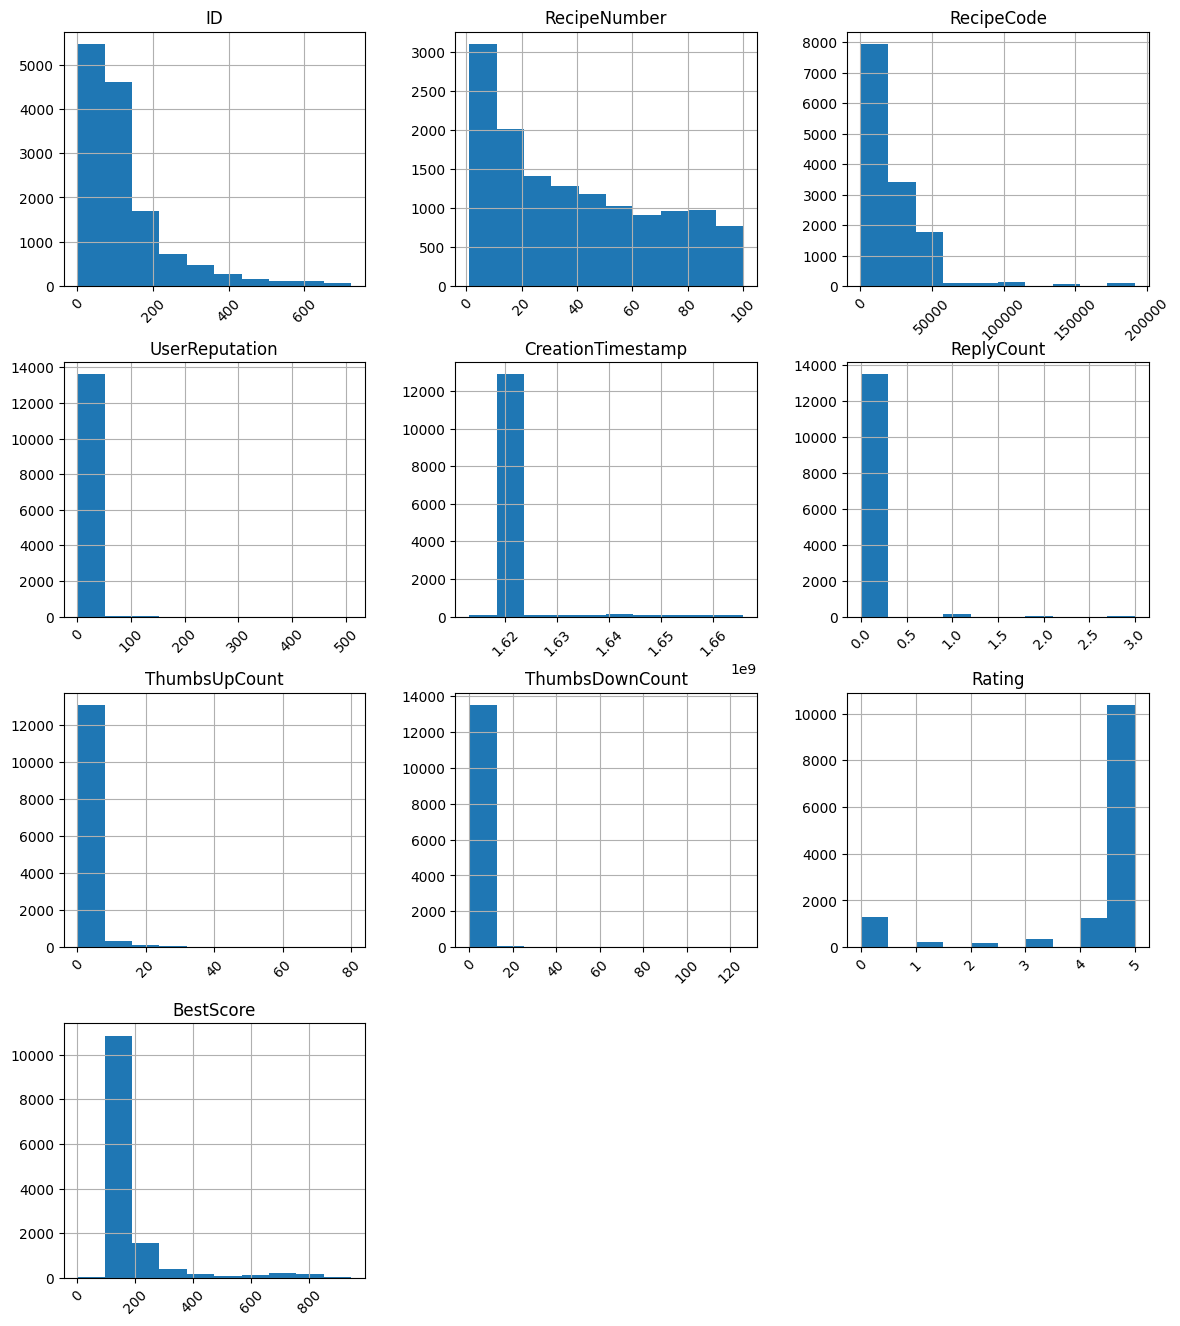

In [20]:
# Creating Histogram of Int & Float d_types Columns of Train Dataset
df_train.hist(figsize=(14,14), xrot=45)   # Figure size 14x14 and X axis rotation = 45 degree
plt.subplots_adjust(top=1)
plt.show()   

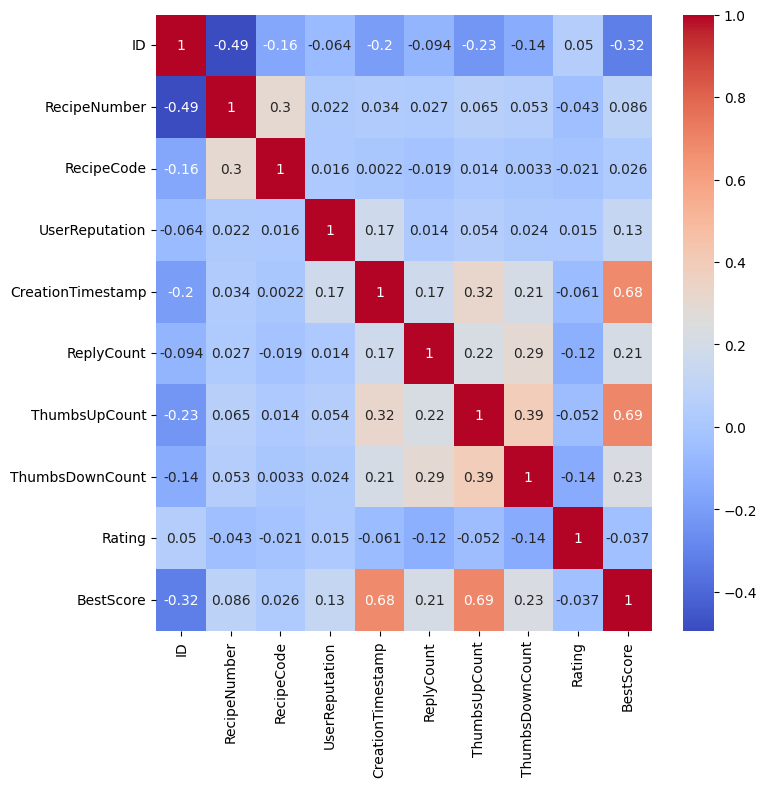

In [21]:
# Correlation Heatmap of Int & Float d_types using correlation matrix & seaborn heatmap
plt.figure(figsize=(8, 8))
correlation_matrix = (df_train.select_dtypes(exclude='object')).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0)
plt.show()

In [22]:
# Correlations with Label/Target Variable Rating Column
correlation_matrix['Rating']

ID                   0.049673
RecipeNumber        -0.043127
RecipeCode          -0.020714
UserReputation       0.015038
CreationTimestamp   -0.061216
ReplyCount          -0.124860
ThumbsUpCount       -0.051752
ThumbsDownCount     -0.142273
Rating               1.000000
BestScore           -0.036719
Name: Rating, dtype: float64

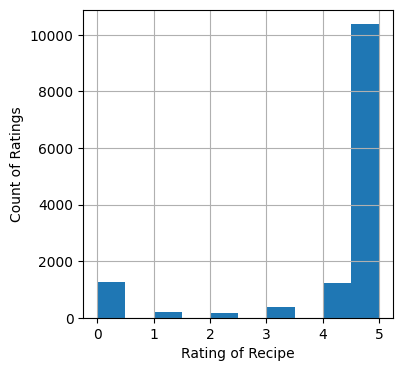

In [28]:
# Distribution of Rating Column in Training Dataset
df_train['Rating'].hist(figsize=(4,4))
plt.xlabel("Rating of Recipe")
plt.ylabel("Count of Ratings")
plt.show()

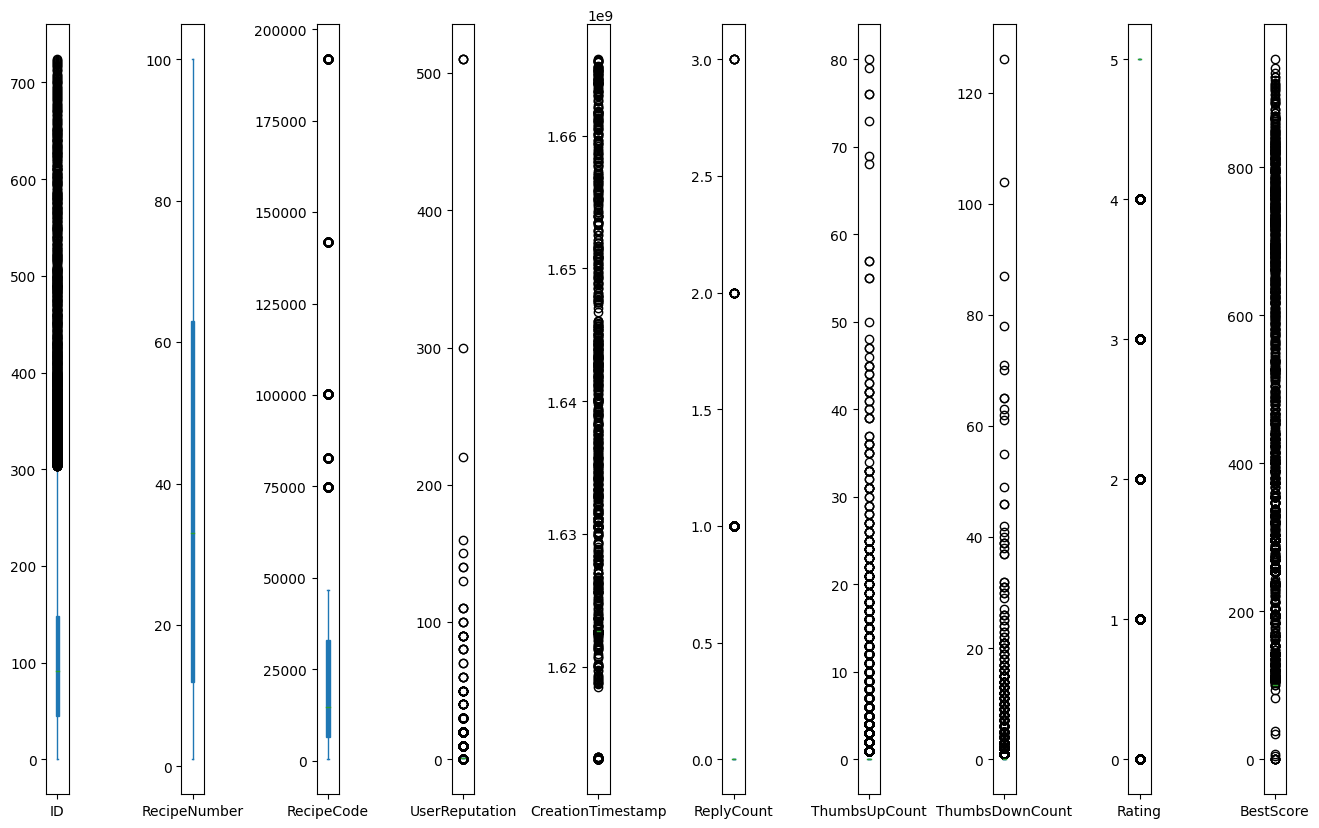

In [29]:
# Box plot to check for Presence of Outliers
df_train.plot(kind='box',sharey = False, subplots=True, figsize=(16,10),patch_artist=True,return_type='both')
plt.subplots_adjust(wspace = 5)
plt.show()

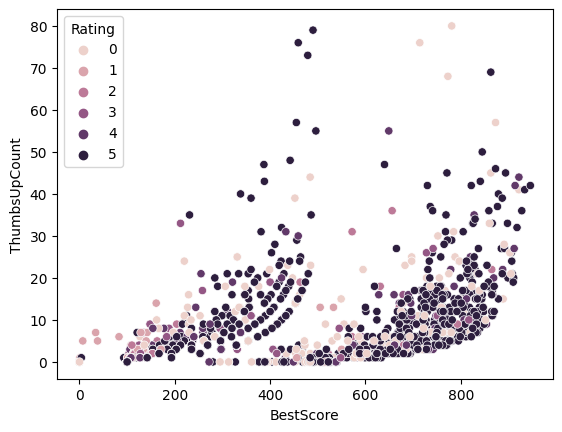

In [30]:
# ScatterPlot between BestScore and ThumbsUpCount for each rating to see their positive correlation 
sns.scatterplot(x="BestScore",y="ThumbsUpCount",hue="Rating",data=df_train)
plt.show()

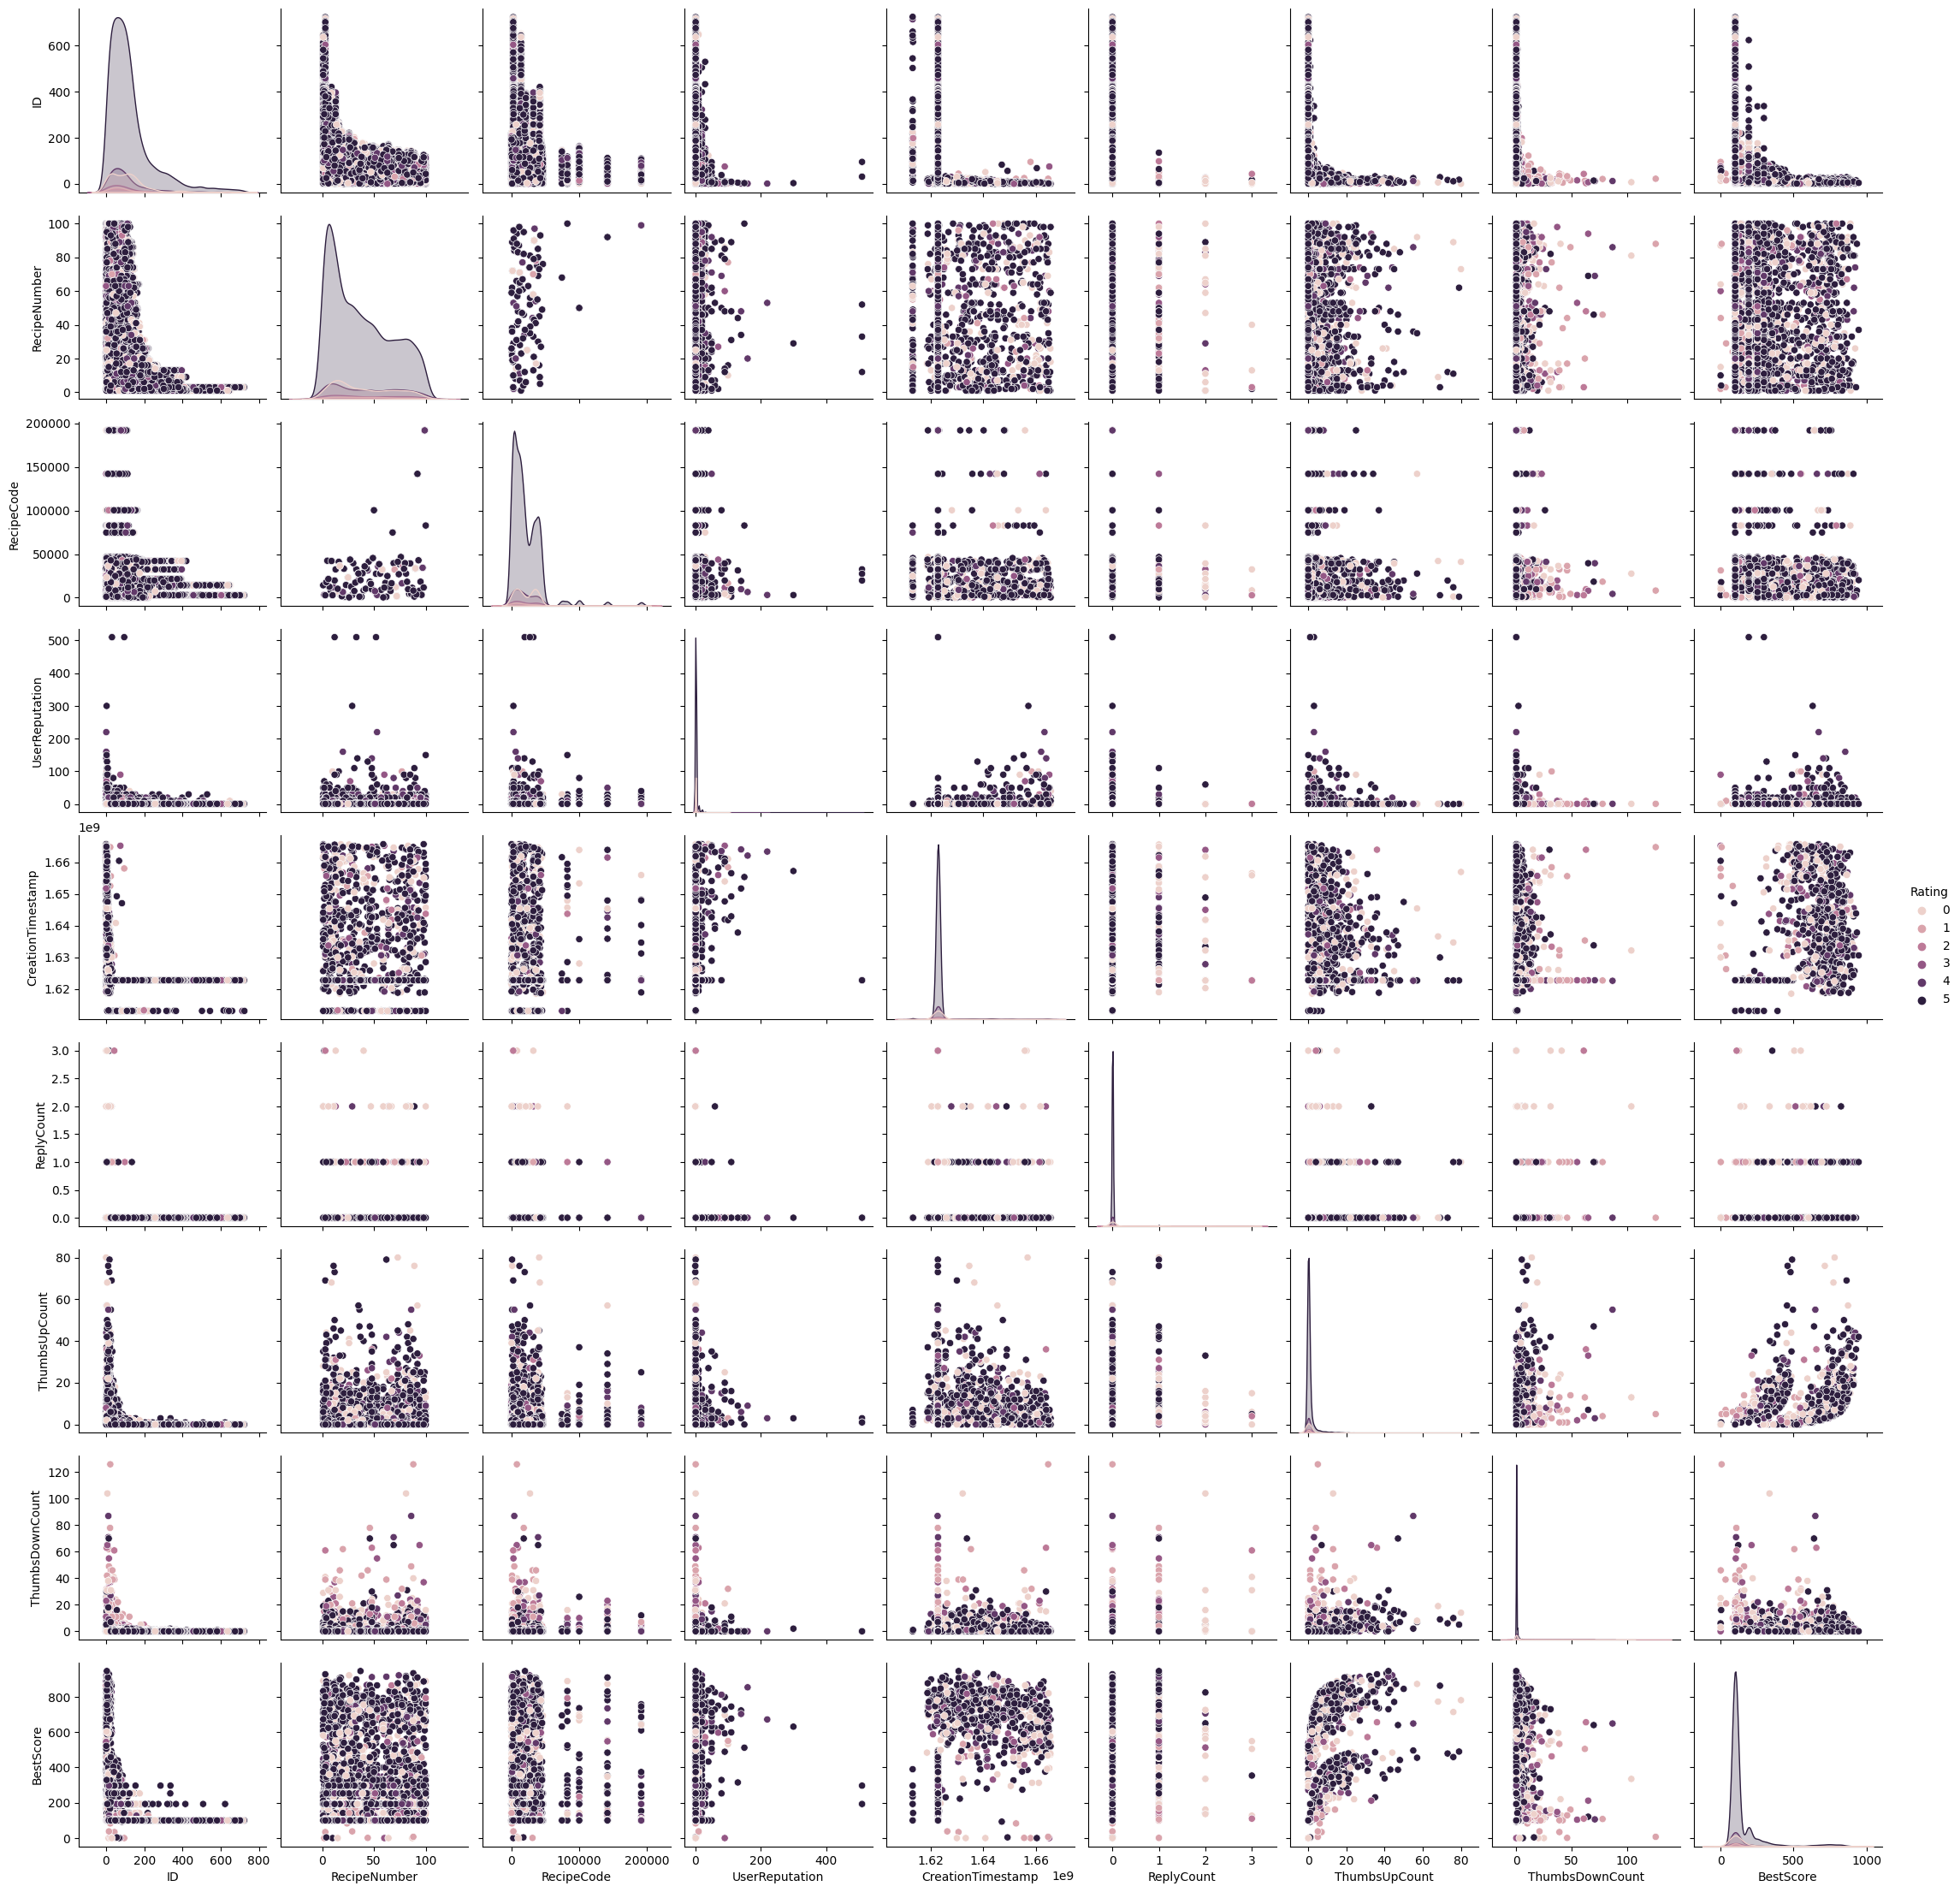

In [31]:
# PairPlot For Train Dataset Columns with label "Rating"
sns.pairplot(data=df_train,hue="Rating")
plt.show()

**Test Dataset**

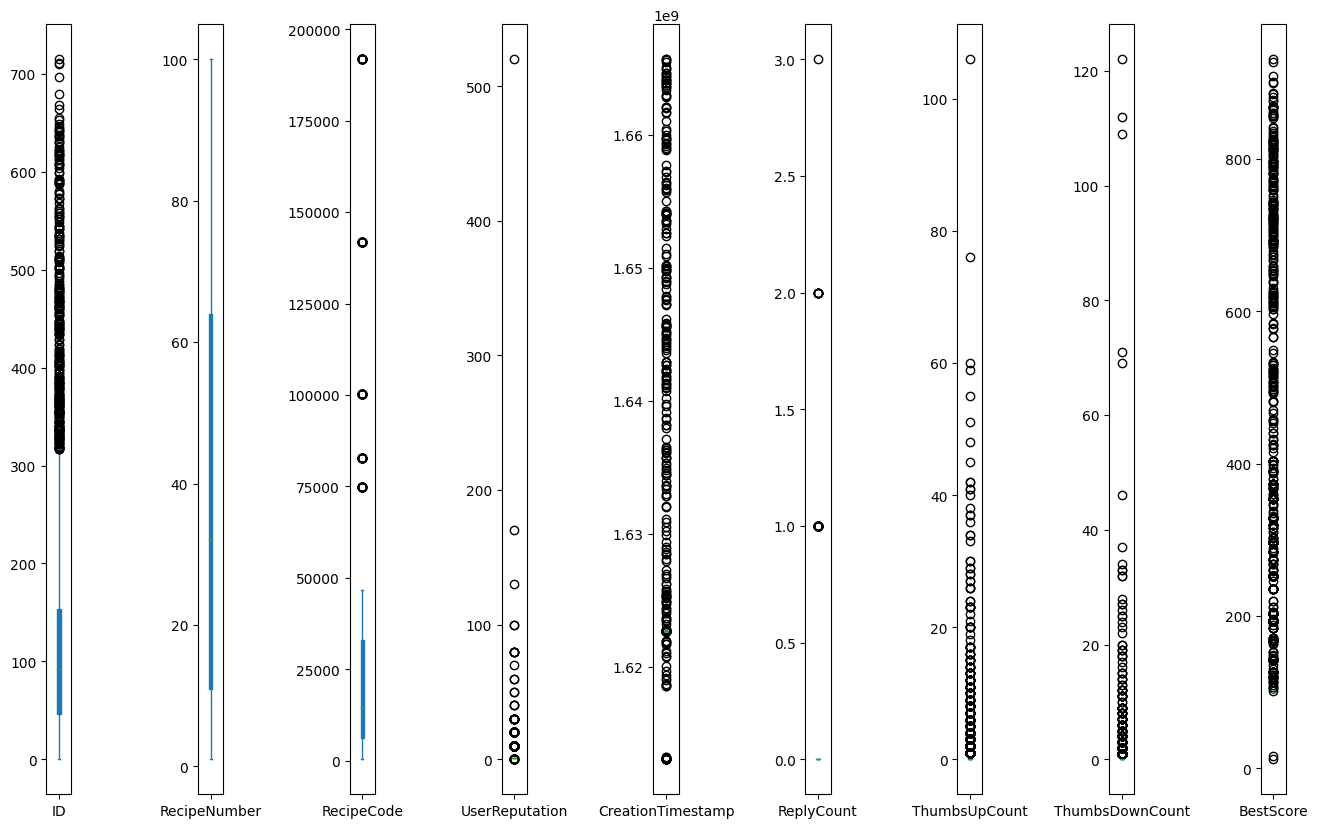

In [61]:
# Box plot to check for Presence of Outliers
df_test.plot(kind='box',sharey = False, subplots=True, figsize=(16,10),patch_artist=True,return_type='both')
plt.subplots_adjust(wspace = 5)
plt.show()

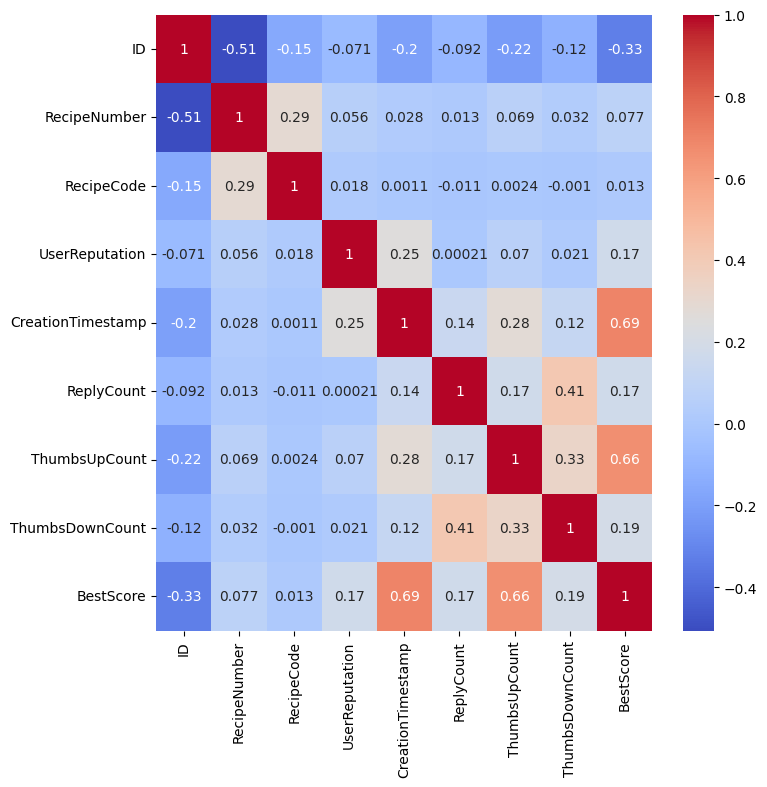

In [62]:
# Correlation Heatmap of Int & Float d_types using correlation matrix & seaborn heatmap
plt.figure(figsize=(8, 8))
correlation_matrix = (df_test.select_dtypes(exclude='object')).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0)
plt.show()

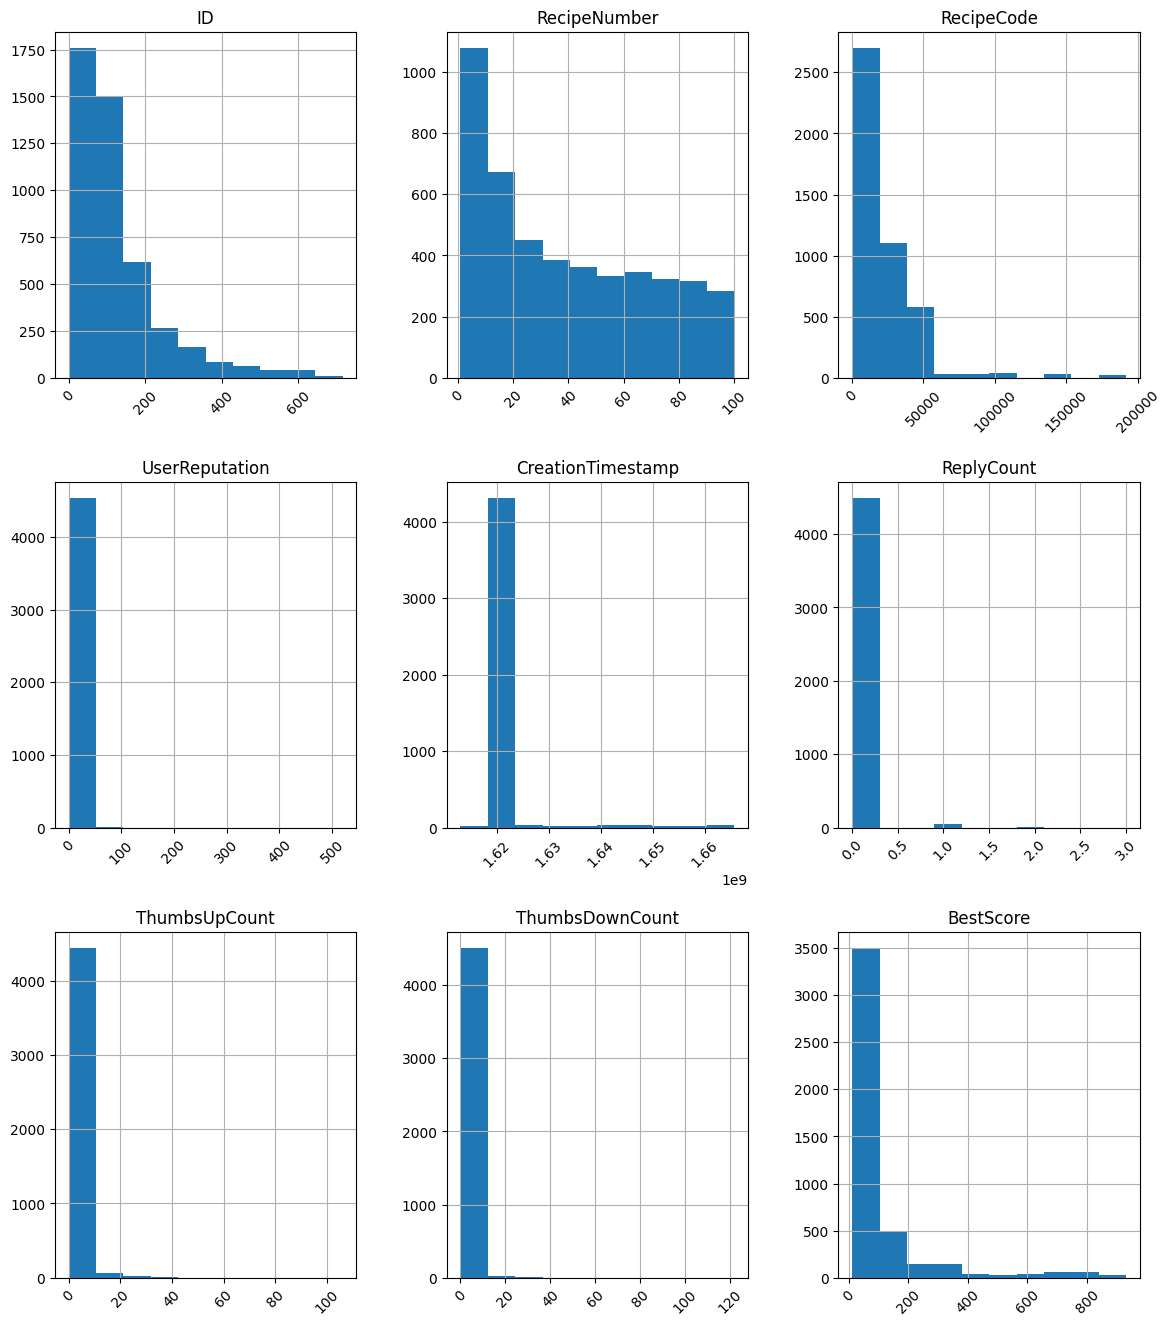

In [71]:
# Creating Histogram of Int & Float d_types Columns of Test Dataset
df_test.hist(figsize=(14,14), xrot=45)   # Figure size 14x14 and X axis rotation = 45 degree
plt.subplots_adjust(top=1)
plt.show()   

##  PreProcessing of Data

#### Removing 2 Rows having null values in Recipe Review Column in Training Dataset by dropping them

In [23]:
# Dropping the Na value rows of Column Category Recipe_Review from Dataset
df_train_droped = df_train.dropna()
df_train_droped.shape

(13634, 15)

In [24]:
# No of Null values in dataset
df_train_droped.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

#### Pre Processing of Dataset


##### Removing the Rating Column from dataset

In [25]:
# Splitting Dataset into Target label y and Variables X 
# Droping CommentId features as all values are unique and contribute very less towards any generalization of models
X=df_train_droped.drop(['Rating','CommentID'],axis=1)
y=df_train_droped['Rating']

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13634 entries, 0 to 13635
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13634 non-null  int64 
 1   RecipeNumber       13634 non-null  int64 
 2   RecipeCode         13634 non-null  int64 
 3   RecipeName         13634 non-null  object
 4   UserID             13634 non-null  object
 5   UserName           13634 non-null  object
 6   UserReputation     13634 non-null  int64 
 7   CreationTimestamp  13634 non-null  int64 
 8   ReplyCount         13634 non-null  int64 
 9   ThumbsUpCount      13634 non-null  int64 
 10  ThumbsDownCount    13634 non-null  int64 
 11  BestScore          13634 non-null  int64 
 12  Recipe_Review      13634 non-null  object
dtypes: int64(9), object(4)
memory usage: 1.5+ MB


In [27]:
y.info()

<class 'pandas.core.series.Series'>
Index: 13634 entries, 0 to 13635
Series name: Rating
Non-Null Count  Dtype
--------------  -----
13634 non-null  int64
dtypes: int64(1)
memory usage: 213.0 KB


##### Train Test Spliting the Training Data

In [28]:
# Splitting Train dataset into Training & Validation datasets with ratio of 8:2 and shuffle is True to allow for randomness in choosing values for Training & validation set values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [29]:
# Column Selecter is Used to Get List of Numerical and Categorical Features and their names for Pipeline & Column Transformer
from sklearn.compose import make_column_selector

num_sel = make_column_selector(dtype_exclude='object')
cat_sel = make_column_selector(dtype_include='object')

num_list = num_sel(X_train)
cat_list = cat_sel(X_train)

print('Cat Featurs: {}, \nNum Features:{}'.format(cat_list, num_list))

Cat Featurs: ['RecipeName', 'UserID', 'UserName', 'Recipe_Review'], 
Num Features:['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']


##### Scaling Of Numerical Features and  Encoding Of Categorical Features of the Datasets
* Numerical Features ---> StandardScaler
* Categorical Features ---> OneHotEncoder

In [30]:
# Using Standard Scaler For scaling the features

standard = StandardScaler()

In [31]:
# Converting categorical features using onehotencoder
onehot = OneHotEncoder(handle_unknown='ignore')

In [32]:
# Combining the Standard Scalar and OneHotEncoder in ColumnTransformer
# Preprocessor To be Applied used ColumnTransformer for Parallism and will be used in pipeline
preprocessor1 = ColumnTransformer([('num',standard, num_list),
                        ('cat',onehot, cat_list)])

##  BaseLine Model (Logistic Regression) 
### First Model
Accuracy (Logistic Regression): **0.77118**

In [89]:
# Simple Logistic Regression Model as Baseline
"""
logreg = LogisticRegression(max_iter=1000)
pipeline = Pipeline([
    ('preprocessor', preprocessor1),
    ('classifier', logreg)
])
pipeline.fit(X_train, y_train)
y_pred_logreg = pipeline.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy (Logistic Regression): {accuracy_logreg:.5f}")
"""

Accuracy (Logistic Regression): 0.77118


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.10      0.17       238
           1       0.40      0.05      0.09        41
           2       0.00      0.00      0.00        40
           3       0.33      0.01      0.02        78
           4       0.38      0.02      0.05       248
           5       0.78      0.99      0.87      2082

    accuracy                           0.77      2727
   macro avg       0.42      0.20      0.20      2727
weighted avg       0.70      0.77      0.69      2727



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


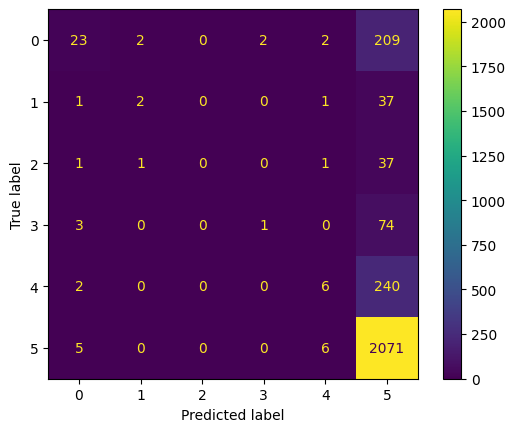

In [90]:
# Confusion matrix of Logistic Regression
"""
class_report = classification_report(y_test, y_pred_logreg)
print("Classification Report:\n", class_report)
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
"""

**HyperTunning The Parameters of Logistic Regression Using GridSearchCV**

In [66]:
"""
X_train_pre = preprocessor1.fit_transform(X_train)
X_test_pre = preprocessor1.transform(X_test)
logreg = LogisticRegression(max_iter = 1000)

#pipeline = Pipeline([
#    ('preprocessor', preprocessor1),
#    ('classifier', logreg)
#])

param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'penalty': [ 'l1','l2','elasticnet'],  # Regularization type
    'solver': ['lbfgs', 'liblinear','newton-cg'] #Solver Type
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_pre, y_train)
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
print(f"Best Estimator hyperparameters: {grid_search.best_estimator_}")
"""

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Estimator hyperparameters: LogisticRegression(C=1, max_iter=1000)


In [67]:
# Accuracy on Validation Set by hypertuned Logistic Regression
"""
best_model.fit(X_train_pre,y_train)
test_accuracy = best_model.score(X_test_pre, y_test)
print(f"Test accuracy(GridSearchCV): {test_accuracy:.5f}")
#y_Pred = best_model.predict(df_test)
"""

Test accuracy(GridSearchCV): 0.77118


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.10      0.17       238
           1       0.40      0.05      0.09        41
           2       0.00      0.00      0.00        40
           3       0.33      0.01      0.02        78
           4       0.38      0.02      0.05       248
           5       0.78      0.99      0.87      2082

    accuracy                           0.77      2727
   macro avg       0.42      0.20      0.20      2727
weighted avg       0.70      0.77      0.69      2727



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


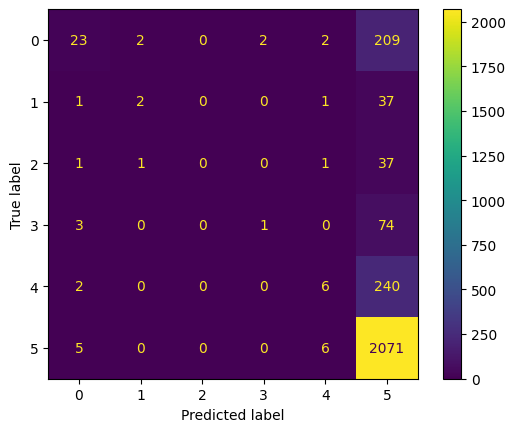

In [70]:
# Confusion matrix of hypertuned Logistic Regression
"""
class_report = classification_report(y_test, best_model.predict(X_test_pre))
print("Classification Report:\n", class_report)
cm = confusion_matrix(y_test, best_model.predict(X_test_pre))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
"""

##  Stacking Classifier Model (ExtraTreeClassifier + LogisticRegression)
### Second Model
Accuracy (Stacking Classifier (ExtraTreeClassifier + LogisticRegression): **0.77961**

On Actual Test Dataset: **0.77738**

In [59]:
# Preprocessing Train and validation sets as Pipeline is giving errors in excution for Stacking Classifier
"""
X_train_pre = preprocessor1.fit_transform(X_train)
X_test_pre = preprocessor1.transform(X_test)

etc_classifier = ExtraTreesClassifier(n_estimators=150, criterion='log_loss', random_state=42)
stacking_classifier = StackingClassifier(
    estimators=[('etc', etc_classifier)],
    final_estimator = LogisticRegression(C=10, max_iter=1000, random_state=42),verbose=1,n_jobs=-1,cv=7
)  


stacking_classifier.fit(X_train_pre, y_train)
y_pred_stack = stacking_classifier.predict(X_test_pre)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
"""

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  7.4min finished


In [60]:
#print(f"Accuracy (StackingClassifier): {accuracy_stack:.5f}")

Accuracy (StackingClassifier): 0.77961


In [ ]:
#df_test_transformed = preprocessor1.transform(df_test)
#y_Pred = stacking_classifier.predict(df_test_transformed)

In [ ]:
#submission = pd.DataFrame({"ID": range(1,4547), "Rating": y_Pred}) 

#submission.to_csv('submission.csv',index=False)

##  Stacking Classifier Model (RandomForestClassifier + LogisticRegression)
### Third Model

Accuracy (StackingClassifier(RandomForrestClassifier + LogisticRegression)): **0.77704**

On Actual Dataset: **0.7776**

In [53]:
# Preprocessing Train and validation sets as Pipeline is giving errors in excution for Stacking Classifier
X_train_pre = preprocessor1.fit_transform(X_train)
X_test_pre = preprocessor1.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)
stacking_classifier = StackingClassifier(
    estimators=[('rf', rf_classifier)],
    final_estimator = LogisticRegression(C=10, max_iter=1000, random_state=42),verbose=1,n_jobs=-1,cv=7
)  



stacking_classifier.fit(X_train_pre, y_train)
y_pred_stack = stacking_classifier.predict(X_test_pre)
accuracy_stack = accuracy_score(y_test, y_pred_stack)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  9.0min finished


Accuracy (Logistic Regression): 0.77704


In [54]:
print(f"Accuracy (StackingClassifier): {accuracy_stack:.5f}")

Accuracy (StackingClassifier): 0.77704


#### Summary of Models:


1. Model is Working Best for a Stack Classifier in which Predictions are combined from WeakLearners and Finally StrongLearner like Logistic Regression is Applied.

2. Model Logistic Regression is able to capture the model more accurately than randomforestclassifier as a baseline model.

3. Model StackingClassifier(ExtraTreesClassifier + LogisticRegression) is performinig much better than baseline model due to improved learning through predictions of DecisionTrees in ExtraTreesClassifier but is inclined to a bit overfitting which can be controlled by changing values of C in Final estimator which is Logistic Regression.

4. Model StackingClassifier(RandomForrestClassifier + LogisticRegression) is performing the best among the models tried and is not showing signs of overfitting or underfitting.

5. Stacking Classifier Models are able to perform better than other models because they are able to handle bias,variance and deal with outliers more accurately.


* **Overall The Third Model is able to Capture the train dataset more accurately and make predictions with highest accuracy for Test Dataset.**

#### Submissions

In [ ]:
# Transforming Test Dataset using preprocessor and predicting using Stacking Classifier as final model
df_test_transformed = preprocessor1.transform(df_test)
y_Pred = stacking_classifier.predict(df_test_transformed)

In [ ]:
# Giving Output Submission.csv file
submission = pd.DataFrame({"ID": range(1,4547), "Rating": y_Pred}) 

submission.to_csv('submission.csv',index=False)

#### Some Results of Other Models Implemented

##### Ridge Classifier

Ridge Classifier Accuracy: **0.76458** 

In [83]:
# RidgeClassifier is performing worse than the Logistic Regression that means loss func of Log_loss is able to make better predictions
"""
ridge_classifier = RidgeClassifier(alpha=1, solver='auto', random_state=42)
ridge_classifier.fit(X_train_preprocessor8, y_train)

# Make predictions on the validation set
ridge_preds = ridge_classifier.predict(X_test_preprocessor8)

# Calculating accuracy for the Ridge
ridge_accuracy = accuracy_score(y_test, ridge_preds)
print(f"Ridge Classifier Accuracy: {ridge_accuracy:.5f}")
"""

Ridge Classifier Accuracy: 0.76458


##### RandomForrest Classifier

RandomForrest Classifier Accuracy: **0.76788**

In [45]:
# RandomForrestClassifier is not able to perform better without any Hypertunning
"""
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier.fit(X_train_pre,y_train)

# Make predictions on the validation set
rf_preds = rf_classifier.predict(X_test_pre)

# Calculating accuracy for the RandomForrest
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"RandomForrest Classifier Accuracy: {rf_accuracy:.5f}")
"""

RandomForrest Classifier Accuracy: 0.76788


##### KNeighbours Classifier

KNeighbours Classifier Accuracy: **0.77264**

In [50]:
# KNN Classifier is able to Perfom better than Logistic Regression after Hypertuning it but gives less accuracy in stacking classifier
"""
knn_classifier = KNeighborsClassifier(n_neighbors=30, p=1,weights='distance')
knn_classifier.fit(X_train_pre,y_train)

# Make predictions on the validation set
knn_preds = knn_classifier.predict(X_test_pre)

# Calculating accuracy for the RandomForrest
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"KNN Classifier Accuracy: {knn_accuracy:.5f}")
"""

KNN Classifier Accuracy: 0.77264
